# Data Collector File
## CSE 881 Project
### Max Gregg, Graham Diedrich, Anne Jansen


First and foremost, you will need API keys! I have some here, and you can use mine, but it is wise to have one per person.

https://api.census.gov/data/key_signup.html

https://www.walkscore.com/professional/api-sign-up.php/


 **Notes here: this .ipynb is made to get and store values from two API sites:**
* US Census
* Walk Score 

**These two sources can access a large range of variables. We will hope to get geometries that fit between these two data sources.**

<font color = 'grey'> Note: this may require some packages to install. You may want to run this on Google Colab if you wish to avoid that.




# <font color = 'green'> Census Variables
    
The nice thing about the census catalog is you can look through it like a catalog; it is dense, there are hundreds of thousands of options, but you can see and read *exactly* what the variable you are calling is, and what geometries are available. 
    
 For example, here is an employment metrics table called 's2301': https://api.census.gov/data/2019/acs/acs1/subject/groups/S2301.html
    
Let's pull one variable from the API list: 
    
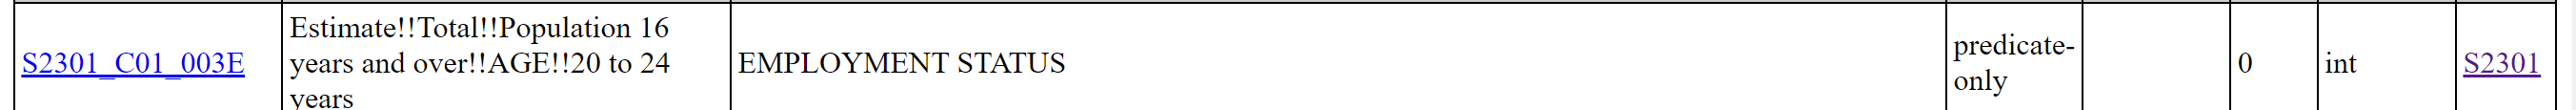
    
    
Pay attention to the suffixes on the actual variable name: **E** means estimate, **EA** means annotation of estimate, and **M** the means the associated margin of error to the estimate (usually given as a percentage.) 
    
So above, this estimate is the total number (count) of people aged 20 to 24 from a population of those 16 or older in the S2301 table. You can choose any geometry--tract,county,state,region--that exists in the table and has a projection!
    
Some geometries have more info than others; for example, most population records are complete, even for rural  or sparsely populated geometries (take for example, Luce County in the Upper Peninsula. There are not many folks there.) But, you may struggle to find labor variables on dentists in Luce County, as the Census Bureau just didn't have enough data to produce that statistic. Seems intuitive, but notably, they may try and produce a statistic on poor data; happens often. This is where the **MA** value comes in handy: if the **MA** is super large, we know it is a poor estimate, and may be best to treat it as we would null or missing data.
    
Here is how you get data from the API. I will do population:

In [ ]:
import pandas as pd
from census import Census # may need to install this
from us import states

In [ ]:
c = Census('2cad02e99c0bde70c790f7391ffb3363c5e426ef')

fields = [
    'NAME',  # Geographic area name (e.g., the name of the state, county, or tract)
    
    # Commute-related fields (Table B08301 - Means of Transportation to Work)
    'B08301_001E',  # Total number of workers 16 years and over who commute to work
    'B08301_002E',  # Number of workers who drove alone to work
    'B08301_003E',  # Number of workers who carpooled to work
    'B08301_008E',  # Number of workers who used public transportation to get to work
    'B08301_011E',  # Number of workers who walked to work
    'B08301_012E',  # Number of workers who bicycled to work
    'B08301_013E',  # Number of workers who used a taxicab, motorcycle, or other means to get to work
    'B08301_014E',  # Number of workers who worked from home
    
    
    # Racial demaogrpahic fields
    'B02001_002E',  # White alone
    'B02001_003E',  # Black or African American alone
    'B02001_004E',  # American Indian and Alaska Native alone
    'B02001_005E',  # Asian alone
    'B02001_006E',  # Native Hawaiian and Other Pacific Islander alone
    'B02001_007E',  # Some other race alone
    'B02001_008E',   # Two or more races
    
    # Population-related fields
    'B01003_001E',  # Total population (Table B01003)
    
    # Income-related field (Table B19101 - Income in the Past 12 Months)
    'B19101_001E',  # Median household income
    
    # Poverty-related field (Table B17001 - Poverty Status in the Past 12 Months)
    'B17001_002E',  # Number of people below the poverty level
    
    # Age-related field (Table B01002 - Median Age by Sex)
    'B01002_001E',  # Median age of the population
    
    # Labor force fields by age group (Table B23001 - Employment Status by Age)
    'B23001_007E',  # Male, 16 to 19 years: In labor force
    'B23001_014E',  # Female, 16 to 19 years: In labor force
    'B23001_021E',  # Male, 20 to 24 years: In labor force
    'B23001_028E',  # Female, 20 to 24 years: In labor force
    'B23001_035E',  # Male, 25 to 29 years: In labor force
    'B23001_042E',  # Female, 25 to 29 years: In labor force
    'B23001_049E',  # Male, 30 to 34 years: In labor force
    'B23001_056E',  # Female, 30 to 34 years: In labor force
    'B23001_063E',  # Male, 35 to 39 years: In labor force
    'B23001_070E',  # Female, 35 to 39 years: In labor force
    'B23001_077E',  # Male, 40 to 44 years: In labor force
    'B23001_084E',  # Female, 40 to 44 years: In labor force
    'B23001_091E',  # Male, 45 to 49 years: In labor force
    'B23001_098E',  # Female, 45 to 49 years: In labor force
    'B23001_105E',  # Male, 50 to 54 years: In labor force
    'B23001_112E',  # Female, 50 to 54 years: In labor force
    
    # Housing-related fields (Table B25001, B25002, B25077, B25010)
    'B25001_001E',  # Total number of housing units
    'B25002_001E',  # Total number of housing units (occupied and unoccupied)
    'B25002_002E',  # Number of occupied housing units
    'B25077_001E',  # Median value of owner-occupied housing units
    'B25010_001E',  # Average household size
    'B25079_001E'   # Median Gross Rent
]

census_data = c.acs5.state_county_tract(
    fields=fields,
    county_fips="*",
    state_fips=states.MI.fips,
    tract="*",
    year=2021
)

df = pd.DataFrame(census_data)

df.rename(columns={
    'B08301_001E': 'Total Commuters',
    'B08301_002E': 'Driving Alone',
    'B08301_003E': 'Carpooling',
    'B08301_008E': 'Public Transportation',
    'B08301_011E': 'Walking',
    'B08301_012E': 'Cycling',
    'B08301_013E': 'Other Means',
    'B08301_014E': 'Worked from Home',
    'B01003_001E': 'Total Population',
    'B19101_001E': 'Median Income',
    'B17001_002E': 'Poverty Count',
    'B01002_001E': 'Median Age',
    'B25001_001E': 'Total Housing Units',
    'B25002_001E': 'Housing Units',
    'B25002_002E': 'Occupied Housing Units',
    'B25077_001E': 'Median Housing Value',
    'B25010_001E': 'Average Household Size',
    'B25079_001E': 'Median Gross Rent',
    'B02001_002E': 'White',
    'B02001_003E': 'Black or African American',
    'B02001_004E': 'American Indian and Alaska Native',
    'B02001_005E': 'Asian',
    'B02001_006E': 'Native Hawaiian and Other Pacific Islander',
    'B02001_007E': 'Some Other Race',
    'B02001_008E': 'Two or More Races'
}, inplace=True)

# Calculate Poverty Rate
df['Poverty Rate'] = (df['Poverty Count'] / df['Total Population']) * 100

# Calculate Labor Force counts
labor_force_columns = {
    'Labor Force 16-19': ['B23001_007E', 'B23001_014E'],
    'Labor Force 20-24': ['B23001_021E', 'B23001_028E'],
    'Labor Force 25-29': ['B23001_035E', 'B23001_042E'],
    'Labor Force 30-34': ['B23001_049E', 'B23001_056E'],
    'Labor Force 35-39': ['B23001_063E', 'B23001_070E'],
    'Labor Force 40-44': ['B23001_077E', 'B23001_084E'],
    'Labor Force 45-49': ['B23001_091E', 'B23001_098E'],
    'Labor Force 50-54': ['B23001_105E', 'B23001_112E']
}

for age_group, columns in labor_force_columns.items():
    df[age_group] = df[columns].astype(int).sum(axis=1)

# Calculate Housing Density (using total population as a proxy for land area)
df['Housing Density'] = df['Total Housing Units'] / (df['Total Population'] / 1000)  # Units per 1000 people

# Calculate Housing Availability
df['Housing Availability'] = (df['Housing Units'] - df['Occupied Housing Units']) / df['Housing Units'] * 100

# Convert relevant columns to numeric type
numeric_columns = ['Total Population', 'Total Housing Units', 'Housing Units', 'Occupied Housing Units', 
                   'Median Housing Value', 'Median Gross Rent', 'Median Age', 'Median Income']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop temporary columns
df = df.drop(columns=[col for col in df.columns if col.startswith('B23001_')])

# Remove duplicates if any
df = df.drop_duplicates()

# Reset index
df = df.reset_index(drop=True)

Let's see what we got... Anything that sticks out? Any stories?

In [ ]:
df.to_csv('881data_census_withrace.csv')

# <font color = 'Purple'> Walk Score and Bike Score
    
Yeah, this is my first time using this so I'm gonna let AI drive the boat here.
    

If you're wondering.... no, the geometries for BikeScore and WalkScore aren't the same: *While Walk Score and Bike Score are valuable metrics for evaluating the walkability and bikeability of an area, they don't directly correspond to census tracts or other census geometries. Instead, they typically provide scores for specific addresses or coordinates.*
    
> But all is not lost yet...
    
    
*However, we can approximate Walk Score and Bike Score values for census tracts by using a representative point within each tract, such as its centroid. Here's how we can integrate this with our existing census data:* --Claude 3.5 Sonnet
    
Ambitious!

In [ ]:
import requests

In [ ]:
# WalkScore API key
walk_score_api_key = "ae097cfb1fc56c03e1706e973c62694c" ### your key here, please

# Function to get WalkScore and BikeScore using lat and lon
def get_walk_bike_score(lat, lon, address):
    url = "https://api.walkscore.com/score"
    params = {
        'format': 'json',
        'lat': lat,
        'lon': lon,
        'address': address,
        'transit': '1',
        'bike': '1',
        'wsapikey': walk_score_api_key,
    }

    # Make the request to WalkScore API
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return {
            'walkscore': data.get('walkscore'),
            'bikescore': data.get('bike'),
            'transitscore': data.get('transit'),
            'description': data.get('description')
        }
    else:
        return {'error': response.status_code}

# Example usage with a centroid or key point of a tract
lat, lon = 42.3314, -83.0458  # Example lat/lon (Detroit)
address = "Detroit, MI"
scores = get_walk_bike_score(lat, lon, address)
print(scores)


Looks like it is easy to overload the WalkScore API... let me know if anyone else comes up with somethin good!

In [ ]:
# WalkScore API key
walk_score_api_key = "ae097cfb1fc56c03e1706e973c62694c" ### your key here, please

# Function to get WalkScore and BikeScore using lat and lon
def get_walk_bike_score(lat, lon, address):
    url = "https://api.walkscore.com/score"
    params = {
        'format': 'json',
        'lat': lat,
        'lon': lon,
        'transit': '1',
        'bike': '1',
        'address': address,
        'wsapikey': walk_score_api_key,
    }

    # Make the request to WalkScore API
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return {
            'walkscore': data.get('walkscore'),
            'bikescore': data.get('bike'),
            'transitscore': data.get('transit'),
            'description': data.get('description')
        }
    else:
        return {'error': response.status_code}

# Example usage with a centroid or key point of a tract
lat, lon = 42.7370, -84.4839  # Example lat/lon (Detroit)
address = "East Lansing, MI"
scores = get_walk_bike_score(lat, lon, address)
print(scores)


**Hooray! We know it works!** We're going to need the centroids of the tracts.

In [ ]:
# Your Census API key
api_key = '2cad02e99c0bde70c790f7391ffb3363c5e426ef'

fields = [
    'NAME',  # Geographic area name (e.g., the name of the state, county, or tract)
    'B01003_001E',  # Doesn't matter what here
]

# Fetch the data
census_data = c.acs5.state_county_tract(
    fields=fields,
    county_fips="*",
    state_fips=states.MI.fips,
    tract="*",
    year=2021
)

# Convert to DataFrame and name it df2
df2 = pd.DataFrame(census_data)

# The state, county, and tract codes are automatically included in the response
# Rename them for clarity
df2 = df2.rename(columns={
    'state': 'state_fips',
    'county': 'county_fips',
    'tract': 'tract_code'
})

# If you need the GEOID, you can generate it
def generate_geoid(row):
    return f"{row['state_fips']}{row['county_fips']}{row['tract_code']}"

df2['GEOID'] = df2.apply(generate_geoid, axis=1)

# Display the first few rows
print(df2.head())

# Display column names
print("\nColumns in df2:")
print(df2.columns)


In [ ]:
# Load the TIGER/Line shapefile for Census tracts (you already have this shapefile)
shapefile_path = 'tl_2023_26_tract.shp'  # Replace with the correct path
tracts_gdf = gpd.read_file(shapefile_path)

# Calculate the centroids of each tract
tracts_gdf['centroid'] = tracts_gdf.geometry.centroid

# Extract latitude and longitude of the centroids
tracts_gdf['lat'] = tracts_gdf.centroid.y
tracts_gdf['lon'] = tracts_gdf.centroid.x

# Select relevant columns (GEOID for tract and the coordinates)
tracts_centroids = tracts_gdf[['GEOID', 'lat', 'lon']]

# Merge the centroid data with df2 using the GEOID
df_with_centroids = df2.merge(tracts_centroids, on='GEOID', how='left')

df_with_centroids


# Code to Get WalkScore and BikeScore for Each Tract:


In [ ]:
import requests
import logging
import time
import pandas as pd
from datetime import datetime

# WalkScore API key
walk_score_api_key = "ae097cfb1fc56c03e1706e973c62694c"  # Your WalkScore API key here

# Set up basic logging to track progress
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Function to get WalkScore and BikeScore using lat and lon, with retries and timeout handling
def get_walk_bike_score(lat, lon, address, max_retries=3, timeout=10):
    url = "https://api.walkscore.com/score"
    params = {
        'format': 'json',
        'lat': lat,
        'lon': lon,
        'transit': '1',
        'bike': '1',
        'address': address,
        'wsapikey': walk_score_api_key,
    }
    
    retries = 0
    while retries < max_retries:
        try:
            # Make the request to WalkScore API with a timeout
            response = requests.get(url, params=params, timeout=timeout)
            if response.status_code == 200:
                data = response.json()
                return {
                    'walkscore': data.get('walkscore'),
                    'bikescore': data.get('bike'),
                    'transitscore': data.get('transit'),
                    'description': data.get('description'),
                    'status': 'success'
                }
            else:
                logging.error(f"Error {response.status_code} for {address}")
                return {'error': response.status_code, 'status': 'failed'}
        except requests.exceptions.Timeout:
            logging.warning(f"Timeout occurred for address: {address}, retrying... ({retries + 1}/{max_retries})")
            retries += 1
            time.sleep(2 ** retries)  # Exponential backoff
        except requests.exceptions.RequestException as e:
            logging.error(f"Request failed for address: {address}, error: {e}")
            return {'error': 'request_failed', 'status': 'failed'}
    
    # If retries are exhausted, return an error
    return {'error': 'max_retries_exceeded', 'status': 'failed'}

# Batch processing settings
batch_size = 200
total_tracts = len(census_tract_data_with_centroids)

# Split the census_tract_data_with_centroids into batches
batches = [census_tract_data_with_centroids.iloc[i:i + batch_size] for i in range(0, total_tracts, batch_size)]

# List to store DataFrames from each batch
batch_results = []

# Loop through each batch
for batch_num, batch in enumerate(batches):
    logging.info(f"Processing batch {batch_num + 1}/{len(batches)} ({len(batch)} tracts)")

    walk_scores = []
    success_count = 0
    fail_count = 0
    
    # Process each row in the batch
    for index, row in batch.iterrows():
        lat = row['lat']
        lon = row['lon']
        address = row['NAME']  # You can use the tract name or a custom address
        scores = get_walk_bike_score(lat, lon, address)
        walk_scores.append(scores)
        
        # Check if the request was successful or failed
        if scores['status'] == 'success':
            success_count += 1
        else:
            fail_count += 1
        
        # Log the progress after every request
        logging.info(f"Processed {index + 1}/{len(batch)} tracts in batch {batch_num + 1}. Successes: {success_count}, Failures: {fail_count}")
        
        # Optional: sleep between requests to avoid rate-limiting
        time.sleep(1)

    # Convert the results to a DataFrame and merge it back with the original batch data
    walk_scores_df = pd.DataFrame(walk_scores)
    batch_with_scores = pd.concat([batch.reset_index(drop=True), walk_scores_df], axis=1)

    # Store the batch result
    batch_results.append(batch_with_scores)
    
    # Save each batch as a CSV with a timestamp for backup
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    batch_filename = f"batch_{batch_num + 1}_walkscore_{timestamp}.csv"
    batch_with_scores.to_csv(batch_filename, index=False)
    logging.info(f"Batch {batch_num + 1} saved as {batch_filename}. Successes: {success_count}, Failures: {fail_count}")

# Combine all the batches into one final DataFrame
final_df = pd.concat(batch_results, axis=0)

# Save the final DataFrame with WalkScore and BikeScore data to a CSV file with a timestamp
final_filename = f"walkscore_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
final_df.to_csv(final_filename, index=False)

logging.info(f"All batches processed and saved as {final_filename}")


# <font color = 'Orange'> Joins

# Data is collected! Below is the join between the
- Census Data
- Walkscore Data

We will use the identical "NAME" column to do the join. 

In [ ]:
cen_df = pd.read_csv("881data_census_withrace.csv")
walk_df = pd.read_csv("walkscore_results_20240926_180704.csv")

In [ ]:
cen_df

In [ ]:
walk_df

In [ ]:
join_df = cen_df.merge(walk_df,
             on = "NAME")

In [ ]:
join_df.to_csv("881_fulldata.csv")

In [ ]:
join_df.describe()

In [ ]:
join_df.columns

In [ ]:
join_df.drop(["Unnamed: 0","B01003_001E"], axis = 1 )

# <font color = 'Green'>  Encoding, Cleaning
    -'bikescore' column is messy, needs regex to clean to have just the score
    - may be worth exploring other columns and make sure data makes sense or is clean
    